## Описание проекта

**Проект:** "Обучение с учителем: качество модели"<br>
<br>
**Заказчик** — Интернет-магазин «В один клик»<br>
**Цель проекта** - Разработка решения, позволяющего персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<br>

**Описание данных:**
<br>
* Источники:
    * Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    * Информация о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    * Показатели среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
 <br>
 
**Характеристики и показатели :**
<br>
* **market_file.csv** - поведении покупателя на сайте<br>

    * **id** — номер покупателя в корпоративной базе данных.
    * **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    * **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
    * **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    * **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число ссылок, звонков, показов рекламы и прочего приходилось на клиента.
    * **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
    * **Длительность**— значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    * **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    * **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
    * **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    * **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
    * **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
    * **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>
    <br>
* **market_money.csv** - Выручка, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
    * **id** — номер покупателя в корпоративной базе данных.
    * **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    * **Выручка** — сумма выручки за период.<br>
    <br>
* **market_time.csv** - Время (в минутах), которое покупатель провёл на сайте в течение периода.<br>
    * **id** — номер покупателя в корпоративной базе данных.
    * **Период** — название периода, во время которого зафиксировано общее время.
    * **минут** — значение времени, проведённого на сайте, в минутах.<br>
    <br>
* **money.csv** - Cреднемесячная прибыль покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
    * **id** — номер покупателя в корпоративной базе данных.
    * **Прибыль** — значение прибыли.<br>
<br>

**Этапы реализации проекта:**
* Загрузка данных
* Предобработка данных
* Исследовательский анализ данных
* Объединение таблиц
* Корреляционный анализ
* Использование пайплайнов
* Анализ важности признаков
* Сегментация покупателей


## Импорт библиотек

In [3]:
#!pip install --upgrade scikit-learn==1.3.0 -q

In [1]:
#!pip install phik
#!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import phik
from phik import phik_matrix

from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler
)
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score,
                             roc_auc_score
                            )

pd.set_option("display.max_columns", None) # Отображать все поля DF
pd.set_option('display.max_colwidth', None)  # Отображать все содержание полей DF


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

bold_start = color.BLUE
bold_end   = color.END


     |████████████████████████████████| 686 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 539 kB 1.2 MB/s eta 0:00:01


## Функции

### distribution_visualization - визуализация зависимостей

In [5]:
def distribution_visualization(
    research_field_,
    research_field_title_x_,
    research_field_title_y_,
    property_fields_,
    property_labels_,
    data_fields_,
    labels_,
    data_,
    uni_color_ = ''
):
    column_count_ = len(property_fields_) + 1
    
    row_count_ = 1
    subplot_index_ = 1
    data_field_ind = 0
    
    for data in data_fields_:
    #    print('Дата - ', data)
        plt.figure(figsize=[25, 3])
    
        subplot_index_ = 1
        plt.subplot(1, column_count_, subplot_index_)
        if uni_color_ == '':
            sns.histplot(x = research_field_, kde = True, hue = data, data = data_, bins = 50) #, color='orange'
        else:
            sns.histplot(x = research_field_, kde = True, data = data_, bins = 50, color = uni_color_)

        title_str = f'Распределение по признаку - {labels_[data_field_ind]}'
        plt.title(title_str)
        plt.xlabel(research_field_title_x_)
        plt.ylabel(research_field_title_y_)
        #plt.legend(title=' ', labels=ferma_data_df[data]) #.unique()
        
        subplot_index_ += 1
        property_fields = 0
        for property in property_fields_:
    #        print('Свойство - ', property)
    #        print('subplot_index_ - ', subplot_index_)
            for value in data_[data].unique():
                query_str = f'{data} == "{value}"'
    #            print('query_str = ', query_str)
    #            print(ferma_data_df.query(query_str))
    
                plt.subplot(1, column_count_, subplot_index_)
                if uni_color_ == '':
                    sns.scatterplot(data = data_.query(query_str), x = property, y = research_field_, label = value)
#                    sns.scatterplot(data = data_.query(query_str), y = property, x = research_field_, label = value)
                else:
                    sns.scatterplot(data = data_.query(query_str), x = property, y = research_field_, label = value, color=uni_color_)
#                    sns.scatterplot(data = data_.query(query_str), y = property, x = research_field_, label = value, color=uni_color_)
            subplot_index_ += 1
            plt.xlabel(property_labels_[property_fields])
            plt.ylabel(research_field_title_x)
            property_fields += 1
        data_field_ind += 1
        plt.show()


### categorical_property_visualization - визуализация категориальных признаков

In [6]:
def categorical_property_visualization(data_, indexes_=[], titles_=[], values_='', aggfunc_='count', nrows_=2, ncols_=3, figsize_=(20, 7)):
    columns = data_.columns
    
    row_ind = 0
    col_ind = 0
    subplot_ind = 0
    
    if nrows_ * ncols_ < len(indexes_):
        print(Несоответствие - nrows_ * ncols_ < len(indexes_))
        return

    fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=figsize_)
    
    for x in axes.ravel():
        x.axis("off")    
        #print(row_ind, col_ind)
        #print(len(axes.shape))

    for ind in indexes_:
        if len(axes.shape) == 1:
            current_ax = axes[subplot_ind]
        else:
            current_ax = axes[row_ind, col_ind]
            
#        current_ax.set_visible(False)
        
        data_.pivot_table(
                index=ind,
                values=values_,
                aggfunc=aggfunc_
            ).plot(
                kind='pie',
                ax = current_ax,
                y='id',
                autopct='%1.0f%%'
            )
        #axes[row_ind, col_ind].set_title(titles[subplot_ind])
        #axes[row_ind, col_ind].get_legend().remove()
        current_ax.set_title(titles[subplot_ind])
        current_ax.get_legend().remove()
    
        subplot_ind += 1
        col_ind += 1
        if col_ind == ncols_: #3
            col_ind = 0
            row_ind += 1

### column_analiser - визуализация числовых признаков

In [7]:
def column_analiser(
    df_,
    column_,
    x_label='',
    y_label='',
    print_unique = False,
    bins_= 70):

    print(bold_start, f'Поле : {column_} - {x_label}', bold_end)
    print('')
    
    print(df_[column_].describe())
    if print_unique:
        print('Список значений')
        print(df_[column_].unique())
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    df_[column_].plot(kind='box', ax=axes[0], vert=False)
    axes[0].set_ylabel(y_label)
    
    axes[1] = plt.hist(
        df_[column_],
        bins=bins_,
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Распределение')    

    plt.show()

### df_inf - вывод информации о датасете

In [8]:
def df_inf(df, head_row=5, drop_duplicates_flag=False):
    try:
        df_name = df.name
        print(bold_start,'Имя:', df_name, bold_end)
    except:
        display(bold_start,'Имя: Не определено', bold_end)
    print('')

    print(bold_start, df_name, '(первые', head_row, 'строк)', bold_end)
    display(df.head(head_row))

    
    print(bold_start,'Информация: ', bold_end)
    df.info()
    print('')

    print(bold_start,'Описание полей: ', bold_end)
    display(df.describe())
    print('')

    print(bold_start,'Пропуски: ', bold_end)
    display(df.isna().sum().T)
    print('')
    
    df_duplicates = []
    df_duplicates = df[df.duplicated()]

    if len(df_duplicates) > 0:
        print(bold_start,'Количество дубликатов:',len(df_duplicates), bold_end)
        print(bold_start,'Дубликаты (первые', head_row, 'строк)', bold_end)
        display(df_duplicates.head(head_row))
        if drop_duplicates_flag:
            print(bold_start,'Дубликаты удалены!', bold_end)
            df.drop_duplicates(keep = 'first', inplace = True)
            print(bold_start,'Количество дубликатов после удаления:',len(df_duplicates), bold_end)
    else:
        print(bold_start,'Дубликаты не обнаружены!', bold_end)
    return df_duplicates

### check_categorical_fields() - вывод уникальных значений полей

In [9]:
def check_categorical_fields(df_, fields_lst):
    for field in fields_lst:
        display(f'Поле {field} - {np.sort(df_[field].unique())}')

## Загрузка данных

In [10]:
try:
    market_file_df = pd.read_csv('market_file.csv', sep = ',', decimal = ',')
    market_file_df.name = 'market_file_df'
except:
    print('Ошибка загрузки - market_file.csv')
    market_file_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', sep = ',', decimal = ',')
    market_file_df.name = 'market_file_df'

try:
    market_money_df = pd.read_csv('market_money.csv', sep = ',', decimal = ',')
    market_money_df.name = 'market_money_df'
except:
    print('Ошибка загрузки - market_money.csv')
    market_money_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', sep = ',', decimal = ',')
    market_money_df.name = 'market_money_df'

try:
    market_time_df = pd.read_csv('market_time.csv', sep = ',', decimal = ',')
    market_time_df.name = 'market_time_df'
except:
    print('Ошибка загрузки - market_time.csv')
    market_time_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', sep = ',', decimal = ',')
    market_time_df.name = 'market_time_df'

try:
    money_df = pd.read_csv('money.csv', sep = ';', decimal = ',')
    money_df.name = 'money_df'
except:
    print('Ошибка загрузки - money.csv')
    money_df = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep = ';', decimal = ',')
    money_df.name = 'money_df'

Ошибка загрузки - market_file.csv
Ошибка загрузки - market_money.csv
Ошибка загрузки - market_time.csv
Ошибка загрузки - money.csv


## Предобработка данных

### market_file_df

In [11]:
duplicates = df_inf(market_file_df, head_row=5, drop_duplicates_flag=False)

 Имя: market_file_df 

 market_file_df (первые 5 строк) 


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса              

,id,Маркет_актив_тек_мес,Длительность,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.011538,601.898462,3.27000,2.840000,4.185385,8.176923
std,375.421985,0.696868,249.856289,1.35535,1.971451,1.955298,3.978126
min,215348.000000,3.000000,110.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,4.000000,405.500000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.000000,606.000000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.000000,806.000000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,5.000000,1079.000000,6.00000,10.000000,9.000000,20.000000



 Пропуски:  


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


 Дубликаты не обнаружены! 


In [12]:
# Переименование столбцов - замена заглавных букв и пробелов в наименовании
market_file_df.columns = map(str.lower, market_file_df.columns)
market_file_df.columns = market_file_df.columns.str.replace(' ', '_')

market_file_df['маркет_актив_6_мес'] = market_file_df['маркет_актив_6_мес'].astype(float) 
market_file_df['акционные_покупки'] = market_file_df['акционные_покупки'].astype(float)

duration_check = market_file_df['длительность'].sum()
#market_file_df.columns

In [13]:
# Отображение уникальных значений
check_categorical_fields(market_file_df, fields_lst=[
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
                                                    ])
# Замена "мусорных" значений
market_file_df['тип_сервиса'] = market_file_df['тип_сервиса'].str.replace('стандартт', 'стандарт')

"Поле тип_сервиса - ['премиум' 'стандарт' 'стандартт']"

"Поле разрешить_сообщать - ['да' 'нет']"

"Поле популярная_категория - ['Домашний текстиль' 'Косметика и аксесуары' 'Кухонная посуда'\n 'Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'\n 'Товары для детей']"

### market_money_df

In [14]:
duplicates = df_inf(market_money_df, head_row=5, drop_duplicates_flag=False)

 Имя: market_money_df 

 market_money_df (первые 5 строк) 


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB

 Описание полей:  


,id
count,3900.000000
mean,215997.500000
std,375.325686
min,215348.000000
25%,215672.750000
50%,215997.500000
75%,216322.250000
max,216647.000000



 Пропуски:  


id         0
Период     0
Выручка    0
dtype: int64


 Дубликаты не обнаружены! 


In [15]:
# Переименование столбцов - замена заглавных букв и пробелов в наименовании
market_money_df.columns = map(str.lower, market_money_df.columns)
market_money_df.columns = market_money_df.columns.str.replace(' ', '_')
market_money_df.columns

check_categorical_fields(market_money_df, fields_lst=['период'])
market_money_df['период'] = market_money_df['период'].str.replace(
    'препредыдущий_месяц',
    'пре_предыдущий_месяц'
                                                                 )
check_categorical_fields(market_money_df, fields_lst=['период'])

# Изменение типа данных
market_money_df['выручка'] = market_money_df['выручка'].astype(float)

"Поле период - ['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']"

"Поле период - ['пре_предыдущий_месяц' 'предыдущий_месяц' 'текущий_месяц']"

In [16]:
#print(market_money_df.groupby(['период'])['выручка'].sum())

### market_time_df

In [17]:
duplicates = df_inf(market_time_df, head_row = 5, drop_duplicates_flag=False)

 Имя: market_time_df 

 market_time_df (первые 5 строк) 


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

 Описание полей:  


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000



 Пропуски:  


id        0
Период    0
минут     0
dtype: int64


 Дубликаты не обнаружены! 


In [18]:
# Переименование столбцов - замена заглавных букв и пробелов в наименовании
market_time_df.columns = map(str.lower, market_time_df.columns)
check_categorical_fields(market_time_df, fields_lst=['период'])

# Замена "мусорных" значений
market_time_df['период'] = market_time_df['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

#print(market_money_df.groupby(['период'])['выручка'].sum())
time_check = market_time_df['минут'].sum()

"Поле период - ['предыдцщий_месяц' 'текущий_месяц']"

### money_df

In [19]:
duplicates = df_inf(money_df, head_row = 5, drop_duplicates_flag=False)

 Имя: money_df 

 money_df (первые 5 строк) 


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB

 Описание полей:  


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000



 Пропуски:  


id         0
Прибыль    0
dtype: int64


 Дубликаты не обнаружены! 


In [20]:
money_df.columns = map(str.lower, money_df.columns)
profit_check = money_df['прибыль'].sum()

### Выводы

* Предоставленные данные соответствуют описанию
* Пропуски и дубликаты не обнаружены
* Во всех таблицах в именах чтолбцов заменены пробелы на знак - подчеркивание и прописные буквы на строчные
<br>
* **market_file_df** - поведении покупателя на сайте
    * поле `маркет_актив_6_мес` приведено к типу 'float'
    * поле `акционные_покупки`  приведено к типу 'float'
    * значение `стандартт` в столбце `тип_сервиса` заменено на `стандарт`
* **market_money_df** - Выручка, которую получает магазин с покупателя, сколько покупатель всего потратил за период взаимодействия с сайтом.
    * значение `препредыдущий_месяц` в столбце `период` заменено на `пре_предыдущий_месяц`
* **market_time_df** - Время (в минутах), которое покупатель провёл на сайте в течение периода.
    * значение `предыдцщий_месяц` в столбце `период` заменено на `предыдущий_месяц`

## Исследовательский анализ

### Маркет_актив_6_мес

 Поле : маркет_актив_6_мес - Активность 6 мес 

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


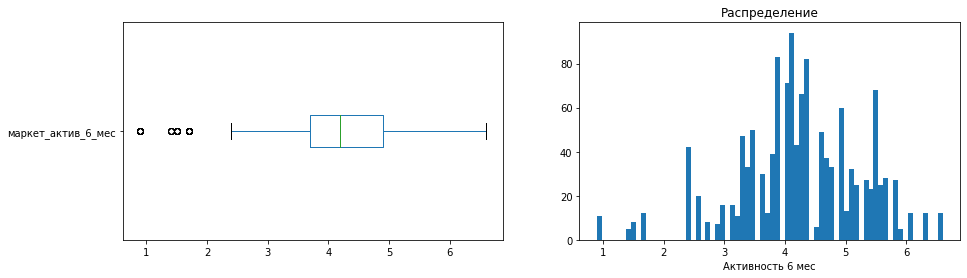

In [21]:
column_analiser(
    market_file_df,
    'маркет_актив_6_мес',
    x_label = 'Активность 6 мес',
    y_label = '',
    print_unique = False
               )

### Маркет_актив_тек_мес

 Поле : маркет_актив_тек_мес - Активность текущий мес 

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


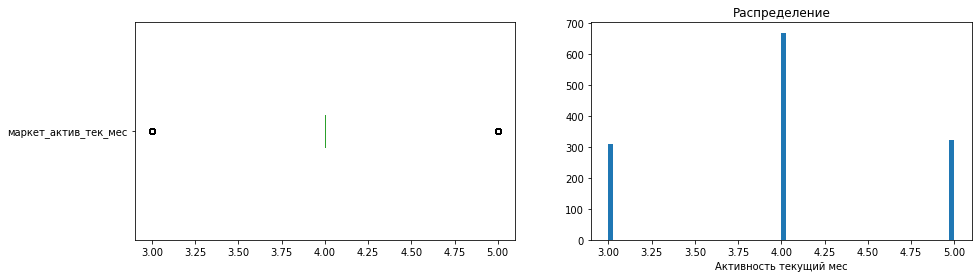

In [22]:
column_analiser(
    market_file_df,
    'маркет_актив_тек_мес',
    x_label='Активность текущий мес',
    y_label='',
    print_unique = False
               )

### Длительность

 Поле : длительность - Дней с момента
 регистрации пользователя 

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


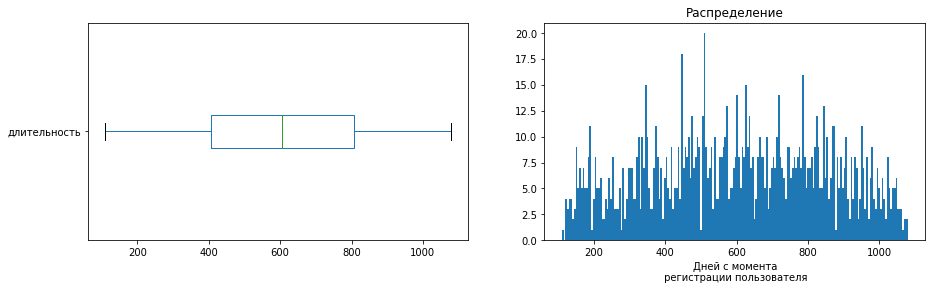

In [23]:
column_analiser(
    market_file_df,
    'длительность',
    x_label='Дней с момента\n регистрации пользователя',
    y_label='',
    print_unique = False,
    bins_ = 200)

### Минут

 Поле : минут - Время на сайте в минутах за период 

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


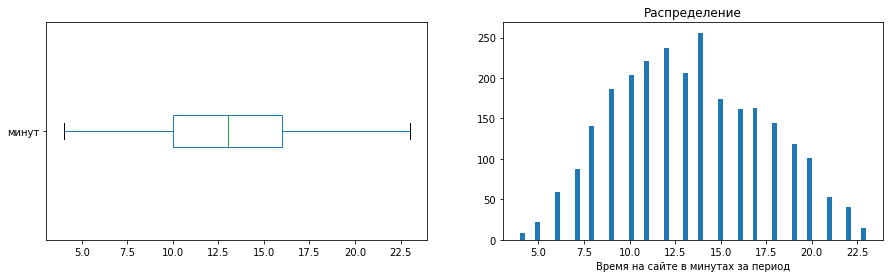

In [24]:
column_analiser(
    market_time_df,
    'минут',
    x_label='Время на сайте в минутах за период',
    y_label='',
    print_unique = False
               )

### Акционные_покупки

 Поле : акционные_покупки - Среднемесячная доля покупок по акции 
 от общего числа покупок за последние 6 месяцев 

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


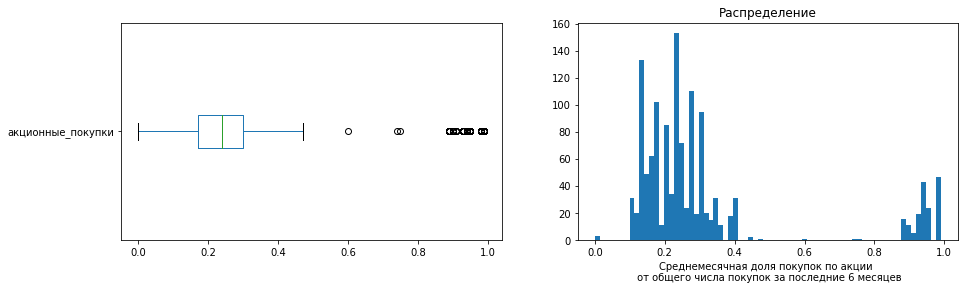

In [25]:
column_analiser(
    market_file_df,
    'акционные_покупки',
    x_label='Среднемесячная доля покупок по акции \n от общего числа покупок за последние 6 месяцев',
    y_label='',
    print_unique = False
               )

### Средний_просмотр_категорий_за_визит

 Поле : средний_просмотр_категорий_за_визит - Среднее количество просмотренных
 покупателем за месяц. 

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


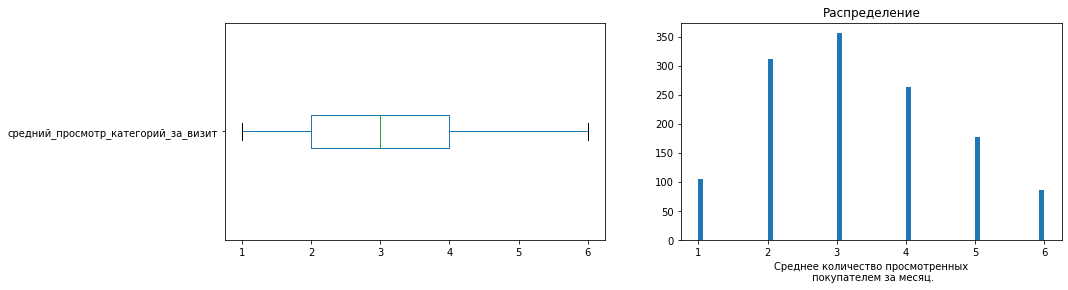

In [26]:
column_analiser(
    market_file_df,
    'средний_просмотр_категорий_за_визит',
    x_label = 'Среднее количество просмотренных\n покупателем за месяц.',
    y_label='',
    print_unique = False
)

### Неоплаченные_продукты_штук_квартал

 Поле : неоплаченные_продукты_штук_квартал - Общее число неоплаченных товаров
 в корзине за последние 3 месяца 

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


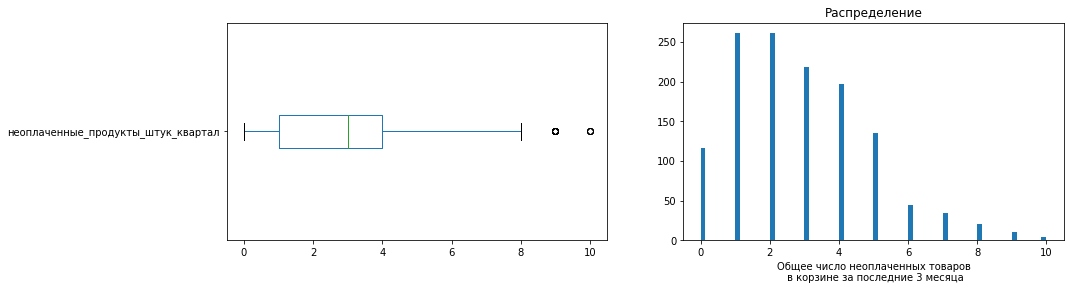

In [27]:
column_analiser(
    market_file_df,
    'неоплаченные_продукты_штук_квартал',
    x_label = 'Общее число неоплаченных товаров\n в корзине за последние 3 месяца',
    y_label='',
    print_unique = False
)

### Ошибка_сервиса

 Поле : ошибка_сервиса - Количество сбоев, которые коснулись покупателя
 во время посещения сайта. 

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


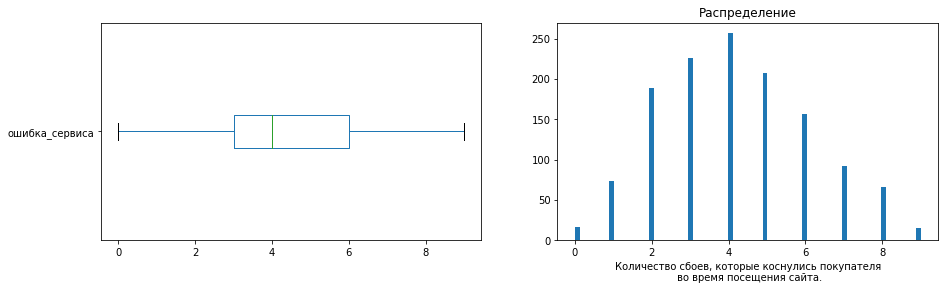

In [28]:
column_analiser(
    market_file_df,
    'ошибка_сервиса',
    x_label = 'Количество сбоев, которые коснулись покупателя\n во время посещения сайта.',
    y_label='',
    print_unique = False
)

### Страниц_за_визит

 Поле : страниц_за_визит - Среднее количество страниц, которые просмотрел покупатель
 за один визит на сайт за последние 3 месяца. 

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


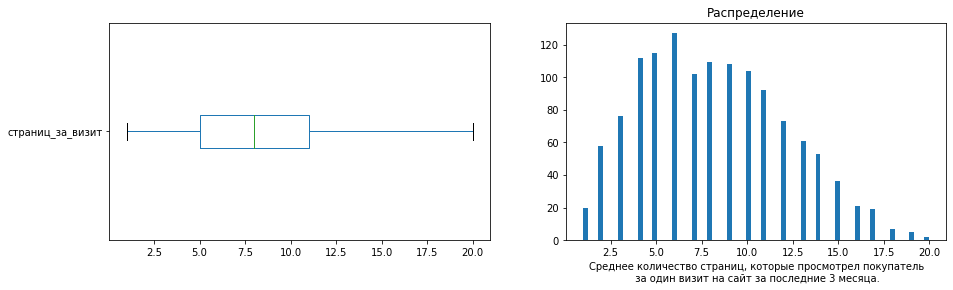

In [29]:
column_analiser(
    market_file_df,
    'страниц_за_визит',
    x_label = 'Среднее количество страниц, которые просмотрел покупатель\n за один визит на сайт за последние 3 месяца.',
    y_label='',
    print_unique = False
)

### Выручка

 Поле : выручка - выручка 

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


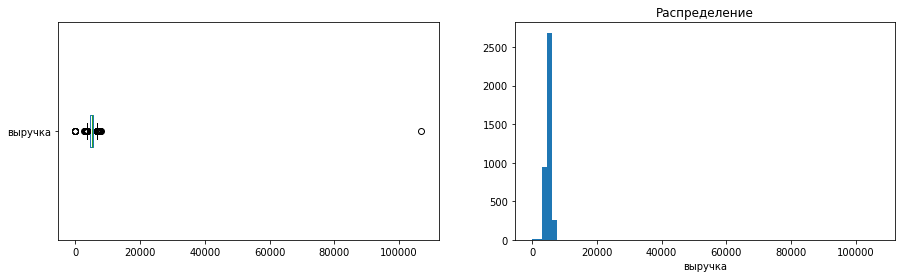

In [30]:
column_analiser(
    market_money_df,
    'выручка',
    x_label = 'выручка',
    y_label='',
    print_unique = False
)

In [31]:
display(market_money_df.query('выручка > 100000'))
mean_money = market_money_df.loc[(market_money_df['выручка'] < 100000) & (market_money_df['id'] == 215380)]['выручка'].mean()
market_money_df.loc[(market_money_df['выручка'] > 100000) & (market_money_df['id'] == 215380), ['выручка']] = mean_money
display(market_money_df.query('id == 215380'))
revenue_check = market_money_df['выручка'].sum()

,id,период,выручка
98,215380,текущий_месяц,106862.2


,id,период,выручка
96,215380,пре_предыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,5564.0


 Поле : выручка - выручка 

count    3900.000000
mean     4999.722154
std       706.966984
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


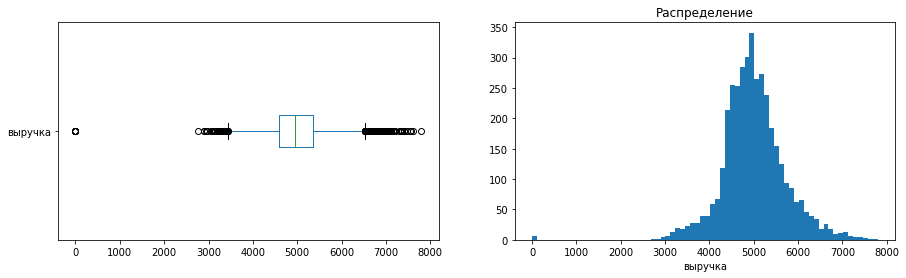

In [32]:
column_analiser(
    market_money_df,
    'выручка',
    x_label = 'выручка',
    y_label='',
    print_unique = False
)

In [33]:
display(market_money_df.query('выручка < 1000'))
#mean_money = market_money_df.loc[(market_money_df['Выручка'] < 100000) & (market_money_df['id'] == 215380)]['Выручка'].mean()
#market_money_df.loc[(market_money_df['Выручка'] > 100000) & (market_money_df['id'] == 215380), ['Выручка']] = mean_money
display(market_money_df.query('id == 215348'))

,id,период,выручка
0,215348,пре_предыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,пре_предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,пре_предыдущий_месяц,0.0


,id,период,выручка
0,215348,пре_предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


### Прибыль

 Поле : прибыль - Прибыль 

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


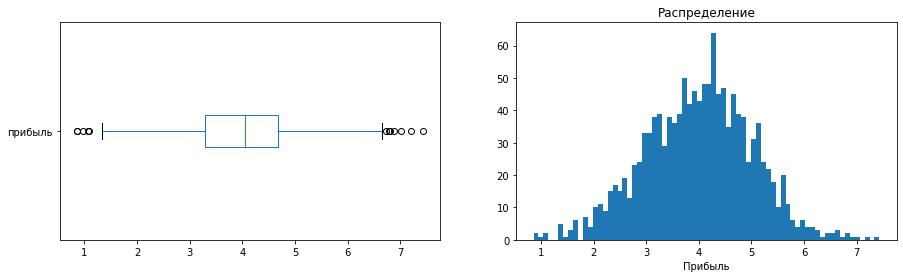

In [34]:
column_analiser(
    money_df,
    'прибыль',
    x_label = 'Прибыль',
    y_label='',
    print_unique = False
)

### Категориальные поля

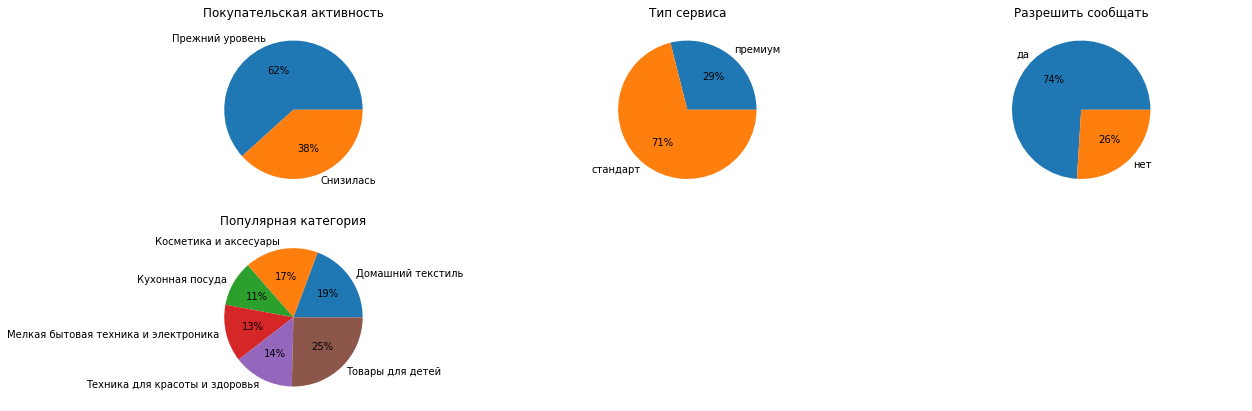

In [35]:
indexes = [
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]
titles = [
    'Покупательская активность',
    'Тип сервиса',
    'Разрешить сообщать',
    'Популярная категория'
]
categorical_property_visualization(
    data_= market_file_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count')

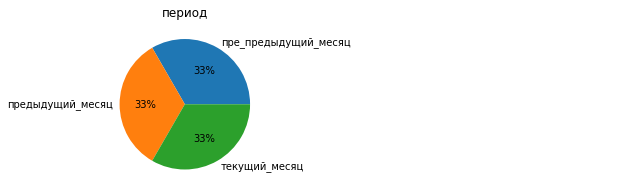

In [36]:
indexes = [
    'период'
]
titles = [
'период'
]
#(data_, indexes_=[], titles_=[], values_='', aggfunc_='count', nrows_=2, ncols_=3, figsize_=(20, 7)):
categorical_property_visualization(
    data_= market_money_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count', 
    nrows_= 1, ncols_= 2, figsize_=(10, 3))

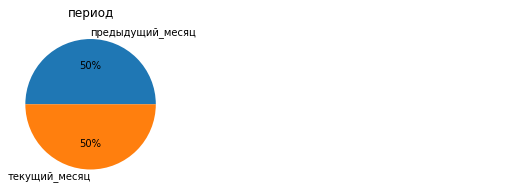

In [37]:
indexes = ['период']
titles = ['период']

#(data_, indexes_=[], titles_=[], values_='', aggfunc_='count', nrows_=2, ncols_=3, figsize_=(20, 7)):
categorical_property_visualization(
    data_= market_time_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count', 
    nrows_= 1, ncols_= 2, figsize_=(10, 3))

### Клиенты с активностью не менее трех месяцев

In [38]:
# Список покупателей с трехмесячной активностью
tree_month_active = market_money_df.query('период == "пре_предыдущий_месяц"')['id'].unique()

#display(market_money_df.query('id == 215348'))

#tree_month_active = len(market_money_df['id'].unique())
#display(tree_month_active)

#display(market_file_df[market_file_df.duplicated(['id'])])
#display(money_df[money_df.duplicated(['id'])])
#display(market_money_df[market_money_df.duplicated(['id'])])
#display(market_time_df[market_time_df.duplicated(['id'])])

### Выводы

* Распределение данных в исследуемых полях близко к нормальному.
* Поле `период` в `market_money_df` содержит уникальные значения: `текущий_месяц`, `предыдущий_месяц` и `пре_предыдущий_месяц`, а в `market_time_df` только `текущий_месяц` и `предыдущий_месяц`.
* Есть выбросы в некоторых полях, которые (выбросы) не являются аномальными. Исключение составляет поле `выручка`
* Аномалия  поля `выручка` заключается в единственном значении = 106862.2 у клиента с id = 215380 в текущем месяце. В предыдущих периодах выручка клиента id = 215380 составляла 5051.0 и 6077.0. Для нормализации распределения значение выручки для данного клиента в текущем месяце заменено на значение = 5564.0 (среднее значение за два предыдущих месяца по данному клиенту)

## Объединение  market_file_df,  market_money_df и market_time_df

In [39]:
data_df = pd.merge(market_money_df, market_time_df, how='left', on=['id', 'период'])

print(f'revenue_check = {revenue_check}')
print(f'revenue       = {market_money_df.выручка.sum()}')

#data_df['минут'] = data_df['минут'].fillna(0)

data_pt_df = data_df.pivot_table(
                index = 'id',
                values = ['выручка', 'минут'],
                columns = ['период'],
                aggfunc = 'sum'
            )

data_pt_df.reset_index(inplace=True)
data_pt_df.columns = [
    'id',
    'выручка_пре_предыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_пре_предыдущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]

data_df = data_pt_df[[
    'id',
    'выручка_пре_предыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]]

#display(len(data_df))
#display(len(market_money_df))
#display(len(market_time_df))
#display(len(data_df))


revenue_check = 19498916.4
revenue       = 19498916.4


In [40]:
data_df = pd.merge(data_df, market_file_df, how='left', on='id')
data_df.info()
display(data_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   выручка_пре_предыдущий_месяц         1300 non-null   float64
 2   выручка_предыдущий_месяц             1300 non-null   float64
 3   выручка_текущий_месяц                1300 non-null   float64
 4   минут_предыдущий_месяц               1300 non-null   float64
 5   минут_текущий_месяц                  1300 non-null   float64
 6   покупательская_активность            1300 non-null   object 
 7   тип_сервиса                          1300 non-null   object 
 8   разрешить_сообщать                   1300 non-null   object 
 9   маркет_актив_6_мес                   1300 non-null   float64
 10  маркет_актив_тек_мес                 1300 non-null   int64  
 11  длительность                  

,id,выручка_пре_предыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,0.0,0.0,3293.1,13.0,14.0,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,4472.0,5216.0,4971.6,12.0,10.0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,4826.0,5457.5,5058.4,8.0,13.0,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


In [41]:
print(f'revenue_check = {revenue_check}')
print(f'revenue       = {data_df.выручка_пре_предыдущий_месяц.sum() + data_df.выручка_предыдущий_месяц.sum() + data_df.выручка_текущий_месяц.sum()}')
print('')
print(f'duration_check = {duration_check}')
print(f'duration       = {data_df.длительность.sum()}')
print('')
print(f'time_check = {time_check}')
print(f'time       = {data_df.минут_предыдущий_месяц.sum() + data_df.минут_текущий_месяц.sum()}')
print('')

print(f'выручка_пре_предыдущий_месяц {data_df.выручка_пре_предыдущий_месяц.sum()}')
print(f'выручка_предыдущий_месяц     {data_df.выручка_предыдущий_месяц.sum()}')
print(f'выручка_текущий_месяц        {data_df.выручка_текущий_месяц.sum()}')
print('')

print(market_money_df.groupby(['период'])['выручка'].sum()) #.reset_index())

revenue_check = 19498916.4
revenue       = 19498916.4

duration_check = 782468
duration       = 782468

time_check = 34674
time       = 34674.0

выручка_пре_предыдущий_месяц 6272769.0
выручка_предыдущий_месяц     6417996.5
выручка_текущий_месяц        6808150.9

период
пре_предыдущий_месяц    6272769.0
предыдущий_месяц        6417996.5
текущий_месяц           6808150.9
Name: выручка, dtype: float64


### Клиенты с не нулевой активностью

In [42]:
# Удаление клиентов, у которых не было покупок в пре_предыдущий_месяц и предыдущий_месяц.
# Клиенты с нулевой активностью в текущем месяце не удалялись, т.к. текущий месяц еще не закончен.

print('')
display(data_df.loc[(data_df['выручка_пре_предыдущий_месяц'] == 0) & (data_df['выручка_предыдущий_месяц'] == 0)])
data_df = data_df.loc[~((data_df['выручка_пре_предыдущий_месяц'] == 0) & (data_df['выручка_предыдущий_месяц'] == 0))]

,id,выручка_пре_предыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,0.0,0.0,3293.1,13.0,14.0,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
9,215357,0.0,0.0,5986.3,12.0,6.0,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5
11,215359,0.0,0.0,4735.0,13.0,11.0,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2


### Выводы

* Объединение `market_file_df`, `market_money_df` и `market_time_df` в `data_df` не повлекло потери данных.
* После объединения значения контрольных переменных `revenue_check`, `duration_check`, `time_check` совпадают с соответствующими рассчитанными значениями по объединенному датасету `data_df`.
* В соответствии с условием задания, в объединенный датасет не вошли данные о клиентах с нулевой активностью, т.е. которые не делали покупки в предыдущие два месяца. 

In [60]:
# КОД РЕВЬЮЕРА
data_df.describe()

,id,выручка_пре_предыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4836.367772,4948.339630,5238.347340,13.469545,13.211257,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,374.578554,333.438742,701.228571,834.045867,3.936323,4.220222,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,215349.000000,4098.000000,2890.000000,2758.700000,5.000000,4.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.000000,4585.000000,4498.500000,4706.600000,11.000000,10.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.000000,4812.000000,5005.500000,5180.300000,13.000000,13.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.000000,5055.000000,5409.000000,5758.600000,17.000000,16.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,5663.000000,6869.500000,7799.400000,23.000000,23.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


## Корреляционный анализ

### Тепловые карты

,выручка_пре_предыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
выручка_пре_предыдущий_месяц,1.000000,0.308707,0.150132,0.348403,0.299989,0.233325,-0.039397,-0.039284,0.149619,-0.249421,0.090105,0.311428
выручка_предыдущий_месяц,0.308707,1.000000,0.878877,-0.084632,-0.082747,-0.005652,-0.027107,0.013739,-0.049596,0.032958,0.035383,-0.067879
выручка_текущий_месяц,0.150132,0.878877,1.000000,-0.143582,-0.164723,0.001213,-0.011767,0.015123,-0.070818,0.061047,0.040470,-0.050206
минут_предыдущий_месяц,0.348403,-0.084632,-0.143582,1.000000,0.360375,0.274003,0.013538,-0.124000,0.148376,-0.183426,0.196017,0.450913
минут_текущий_месяц,0.299989,-0.082747,-0.164723,0.360375,1.000000,0.226345,-0.063044,0.083035,0.233358,-0.214803,0.078089,0.298113
маркет_актив_6_мес,0.233325,-0.005652,0.001213,0.274003,0.226345,1.000000,0.061697,-0.044614,0.185027,-0.134368,0.038656,0.319918
маркет_актив_тек_мес,-0.039397,-0.027107,-0.011767,0.013538,-0.063044,0.061697,1.000000,-0.131979,-0.025158,0.061754,0.087351,0.003144
длительность,-0.039284,0.013739,0.015123,-0.124000,0.083035,-0.044614,-0.131979,1.000000,-0.043150,-0.108822,0.103528,-0.034591
средний_просмотр_категорий_за_визит,0.149619,-0.049596,-0.070818,0.148376,0.233358,0.185027,-0.025158,-0.043150,1.000000,-0.251448,0.010034,0.267536
неоплаченные_продукты_штук_квартал,-0.249421,0.032958,0.061047,-0.183426,-0.214803,-0.134368,0.061754,-0.108822,-0.251448,1.000000,-0.098544,-0.165297


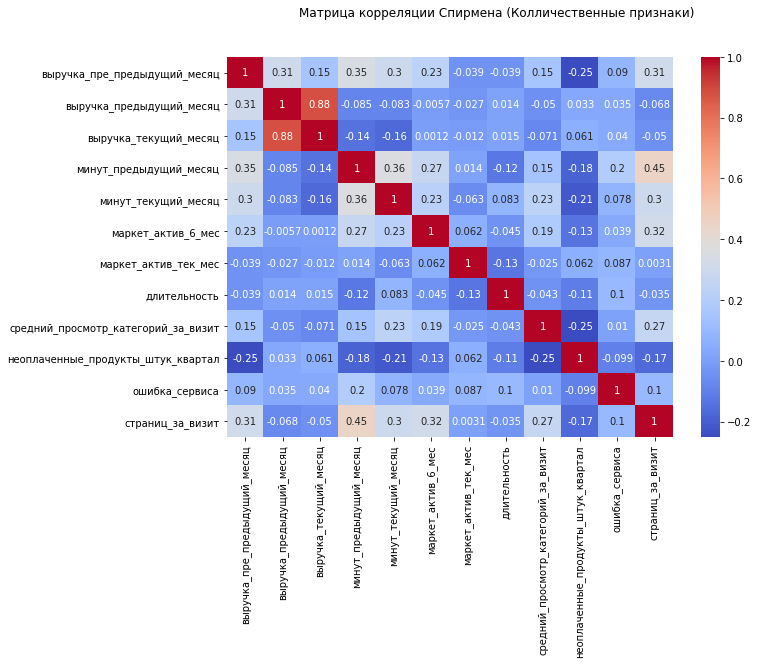

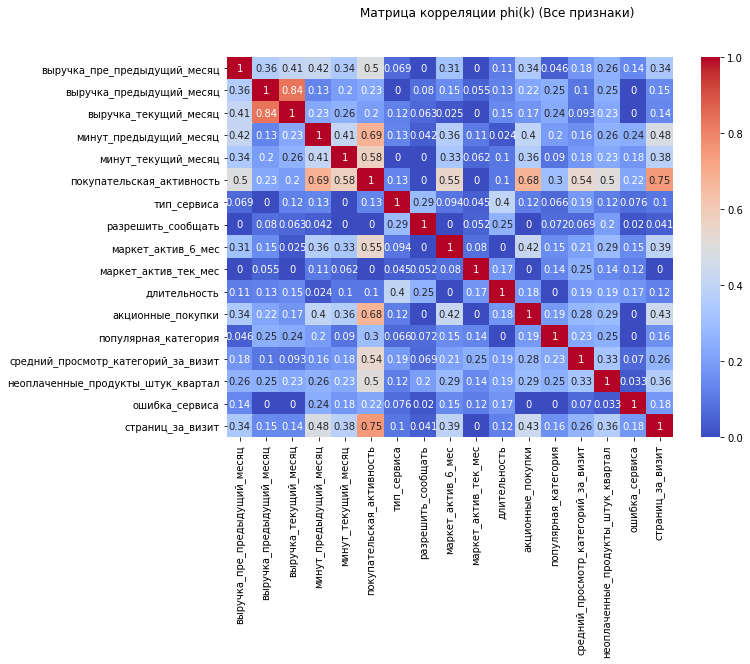

In [43]:
numeric_column = [
    'выручка_пре_предыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'    
]

display(data_df[numeric_column].corr(method='spearman'))

plt.figure(figsize = (10, 7))
plt.suptitle('Матрица корреляции Спирмена (Колличественные признаки)')
sns.heatmap(data_df[numeric_column].corr(method='spearman'), annot=True, cmap='coolwarm')

fig, ax = plt.subplots(figsize=(10, 7))
plt.suptitle('Матрица корреляции phi(k) (Все признаки)')
sns.heatmap(data_df.drop('id', axis=1).phik_matrix(interval_cols=numeric_column), annot=True, cmap='coolwarm');


### Выводы

* Между входными параметрами нет связи выше 0.9, **учитавать мультиколлинеарность нет необходимости**.
* Максимальное значение корреляция Спирмена corr(S) = 0.88 - корреляция выручки за предыдущий и пре_предыдущий месяцы.
* Максимальное значение корреляции для целевого признака `покупательская активность` phi(k) = 0,75. **Утечки целевого признака нет.**

## Подготовка данных для моделирования

### Выделение целевого признака

In [44]:
RANDOM_STATE = 45
TEST_SIZE = 0.25

# Отделение целевого признака
X = data_df.drop(['покупательская_активность', 'id'], axis=1)
y = data_df['покупательская_активность']
y = y.apply(lambda x: 0 if x == 'Прежний уровень' else 1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

#display(y_train)
#display(y_test)

### Списки признаков по категориям

In [45]:
#data_df.info()

# Числовые признаки
num_columns = ['выручка_пре_предыдущий_месяц',
               'выручка_предыдущий_месяц',
               'выручка_текущий_месяц',
               'минут_предыдущий_месяц',
               'минут_текущий_месяц',
               'маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит'
              ]

# Категориальные признаки
ohe_columns = ['разрешить_сообщать',
               'популярная_категория'
              ]

# Порядковые признаки
ord_columns = ['тип_сервиса']

## Создание и обучение моделей

### Создание пайплайнов

In [46]:
# Пайплайн подготовки признаков ohe_columns: заполнение пропусков и кодирование
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

#  Пайплайн подготовки признаков ord_columns: заполнение пропусков и кодирование
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт',
                     'премиум'
                    ],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Общий пайплайн подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### Модель KNeighborsClassifier()

In [47]:
# Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

knn_model = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE,
    n_jobs = -1
)

knn_model.fit(X_train, y_train)
knn_train_roc_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:, 1])

print(bold_start,'ROC-AUC лучшей knn-модели                       :',bold_end, knn_model.best_score_)
print(bold_start,'Площадь под ROC-кривой на тренировочной выборке :',bold_end, knn_train_roc_auc)
print(bold_start,'Парамметры лучшей модели:\n',bold_end , knn_model.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

 ROC-AUC лучшей knn-модели                       :  0.9089272615590798
 Площадь под ROC-кривой на тренировочной выборке :  0.9547676603683889
 Парамметры лучшей модели:
  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
       

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

### Модель DecisionTreeClassifier()

In [48]:
# Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# словарь для модели DecisionTreeClassifier()
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 700),
        'models__max_features': range(2, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

dtc_model = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

dtc_model.fit(X_train, y_train)

dtc_train_roc_auc = roc_auc_score(y_train, dtc_model.predict_proba(X_train)[:, 1])

print(bold_start,'ROC-AUC лучшей dtc-модели                       :',bold_end, dtc_model.best_score_)
print(bold_start,'Площадь под ROC-кривой на тренировочной выборке :',bold_end, dtc_train_roc_auc)
print(bold_start,'Парамметры лучшей модели                        :\n',bold_end, dtc_model.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

 ROC-AUC лучшей dtc-модели                       :  0.7992098131189039
 Площадь под ROC-кривой на тренировочной выборке :  1.0
 Парамметры лучшей модели                        :
  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord'

### Модель LogisticRegression()

In [49]:
# Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

# словарь для модели LogisticRegression()
param_grid = [
    {
        'models': [LogisticRegression(
            random_state = RANDOM_STATE, 
            solver = 'liblinear', 
            penalty = 'l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

lr_model = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE,
    n_jobs = -1
)

lr_model.fit(X_train, y_train)
lr_train_roc_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1])

print(bold_start,'Метрика ROC-AUC лучшей модели :',bold_end, lr_model.best_score_)
print(bold_start,'Площадь под ROC-кривой на тренировочной выборке:',bold_end, lr_train_roc_auc)
print(bold_start,'Лучшая модель:\n',bold_end, lr_model.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

 Метрика ROC-AUC лучшей модели :  0.900975606184697
 Площадь под ROC-кривой на тренировочной выборке:  0.910060052652587
 Лучшая модель:
  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                       

### Модель SVC()

In [50]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE))
])

# словарь SVC() модели
param_grid = [
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

svc_model = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE,
    n_jobs = -1
)

svc_model.fit(X_train, y_train)
svc_train_roc_auc = roc_auc_score(y_train, svc_model.predict_proba(X_train)[:, 1])

print(bold_start,'ROC-AUC лучшей svc-модели                       :',bold_end, svc_model.best_score_)
print(bold_start,'Площадь под ROC-кривой на тренировочной выборке :',bold_end, svc_train_roc_auc)
print(bold_start,'Парамметры лучшей модели                        :\n',bold_end, svc_model.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

 ROC-AUC лучшей svc-модели                       :  0.9087572382299655
 Площадь под ROC-кривой на тренировочной выборке :  0.9539581380538278
 Парамметры лучшей модели                        :
  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                        

### Формирование датасета с параметрами лучших моделей

In [51]:
models_best_score = pd.DataFrame(knn_model.cv_results_).sort_values(by=['rank_test_score']).head(1)
models_best_score['proba_train_roc_auc'] = knn_train_roc_auc

models_best_score = pd.concat([models_best_score,
                               pd.DataFrame(dtc_model.cv_results_).sort_values(by = ['rank_test_score']).head(1)
                              ], ignore_index = True )
models_best_score.loc[models_best_score['proba_train_roc_auc'].isna(), 'proba_train_roc_auc'] = dtc_train_roc_auc

models_best_score = pd.concat([models_best_score,
                               pd.DataFrame(lr_model.cv_results_).sort_values(by = ['rank_test_score']).head(1)
                              ], ignore_index = True)
models_best_score.loc[models_best_score['proba_train_roc_auc'].isna(), 'proba_train_roc_auc'] = lr_train_roc_auc

models_best_score = pd.concat([models_best_score,
                               pd.DataFrame(svc_model.cv_results_).sort_values(by = ['rank_test_score']).head(1)
                              ], ignore_index = True)
models_best_score.loc[models_best_score['proba_train_roc_auc'].isna(), 'proba_train_roc_auc'] = svc_train_roc_auc


display(models_best_score[['param_models', 'params', 'mean_test_score', 'proba_train_roc_auc']].sort_values(by=['mean_test_score'], ascending = False))

,param_models,params,mean_test_score,proba_train_roc_auc
0,KNeighborsClassifier(n_neighbors=9),"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__n_neighbors': 9, 'models': KNeighborsClassifier(n_neighbors=9)}",0.908927,0.954768
3,"SVC(degree=6, probability=True, random_state=45)","{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__kernel': 'rbf', 'models__degree': 6, 'models': SVC(degree=6, probability=True, random_state=45)}",0.908757,0.953958
2,"LogisticRegression(C=2, penalty='l1', random_state=45, solver='liblinear')","{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories=[['стандарт', 'премиум']], handle_unknown='use_encoded_value', unknown_value=nan), SimpleImputer(strategy='most_frequent')), 'preprocessor__num': MinMaxScaler(), 'models__C': 2, 'models': LogisticRegression(C=2, penalty='l1', random_state=45, solver='liblinear')}",0.900976,0.910060
1,"DecisionTreeClassifier(max_depth=565, max_features=8, random_state=45)","{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': MinMaxScaler(), 'models__max_features': 8, 'models__max_depth': 565, 'models': DecisionTreeClassifier(max_depth=565, max_features=8, random_state=45)}",0.799210,1.000000


```python
pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['poly','rbf'],
        'models__degree': range(2,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

search = RandomizedSearchCV(
    pipe, grid,
    random_state = RANDOM_STATE, cv=5, scoring='roc_auc', n_jobs=-1
)
```

### Определение лучшей модели на тестовой выборке

In [52]:
print(bold_start, 'knn - модель', bold_end)
roc_auc_test = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(bold_start, 'Площадь под ROC-кривой на тестовой выборке =',bold_end, round(roc_auc_test, 3))
roc_auc_delta = (roc_auc_test - knn_train_roc_auc) / knn_train_roc_auc * 100
print(bold_start,'Потеря качества на тестовой выборке        = ',bold_end,round(roc_auc_delta, 3),'%')
print('\n')
print(bold_start,'svc - модель',bold_end)
roc_auc_test = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])
print(bold_start,'Площадь под ROC-кривой на тестовой выборке =',bold_end, round(roc_auc_test, 3))
roc_auc_delta = (roc_auc_test - svc_train_roc_auc) / svc_train_roc_auc * 100
print(bold_start,'Потеря качества на тестовой выборке        = ',bold_end,round(roc_auc_delta, 3),'%')


 knn - модель 
 Площадь под ROC-кривой на тестовой выборке =  0.898
 Потеря качества на тестовой выборке        =   -5.919 %


 svc - модель 
 Площадь под ROC-кривой на тестовой выборке =  0.921
 Потеря качества на тестовой выборке        =   -3.472 %


### Итоговый пайплайн по лучшей модели

In [53]:
# Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(degree = 6, probability = True, random_state = RANDOM_STATE)
    )
])

pipe_final.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most...
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц',
                                                   'маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит'])])),
                ('models', SVC(degree=6, probability=True, random_state=45))])

### Выводы

* С использованием пайплайнов были собраны данные по моделям: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC`.
* У моделей `KNeighborsClassifier` и `SVC` показатель `mean_test_score` = 0.909, метрика `roc_auc` = 0.955 и 0.954. Показатели расчитаны на тренеровочной базе.
* Показатели, расчитанные на тестовой базе у моделей `KNeighborsClassifier` и `SVC` значительно отличаются.
    * `knn` - модель
        *  Площадь под ROC-кривой =  0.898
        *  Потеря качества = -5.919 %
    *  `svc` - модель
        *  Площадь под ROC-кривой =  0.921
        *  Потеря качества на тестовой выборке  = -3.472%
<br>

**При том, что значения показателей `knn` и `svc` моделей, расчитанных на тренеровочной базе очень близки, тестовые значения показателей модели `svc` значительно лучше. Для задачи проекта больше подходит `svc` - модель** Параметры лучшей модели - `SVC(degree = 6, probability = True, random_state = RANDOM_STATE)`

## Важность признаков

### LogisticRegression()

In [54]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['разрешить_сообщать',
                                  'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncod...
                                 ['тип_сервиса']),
                                ('num', StandardScaler(),
                                 ['выручка_пре_предыдущий_месяц',
                                  'выручка_предыдущий_месяц',
                                  'выручка_текущий_месяц',
                                  'минут_предыдущий_месяц',
                                  'минут_текущий_месяц', 'маркет_актив_6_мес',
                                  'маркет_актив_тек_мес', 'длительность',
                                  'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит'])])

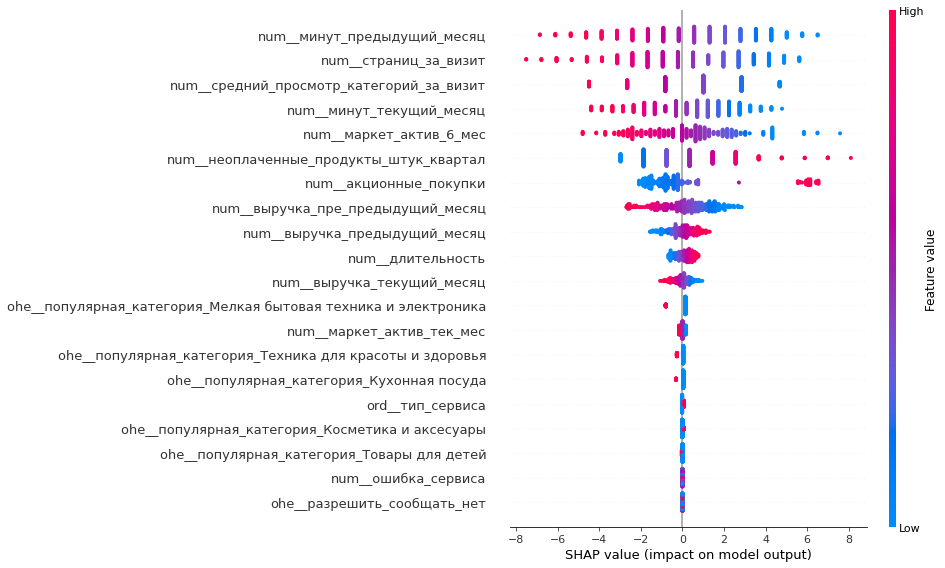

/opt/conda/lib/python3.9/site-packages/shap/plots/_bar.py:260: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(list(y_pos) + list(y_pos + 1e-8), yticklabels + [t.split('=')[-1] for t in yticklabels], fontsize=13)


TypeError: set_ticks() got an unexpected keyword argument 'fontsize'

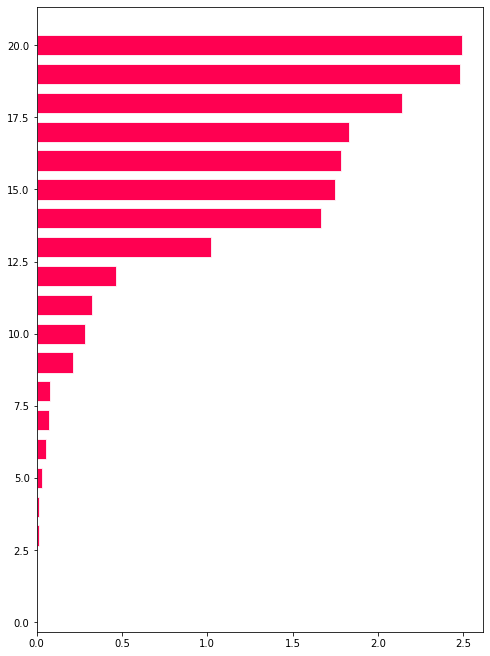

In [55]:
#display(models_best_score[['param_models', 'params', 'mean_test_score', 'proba_train_roc_auc']].sort_values(by=['mean_test_score'], ascending = False))

# Лучшая lr-модель
best_model = lr_model.best_estimator_
X_transformed = pd.DataFrame(data_preprocessor.transform(X_test), columns = data_preprocessor.get_feature_names_out())
#X_transformed = pd.DataFrame(data_preprocessor.transform(X_test), columns = best_model.named_steps['models'][:-1].get_feature_names_out())



#display(X_test.head(3))
#display(X_transformed.head(3))

explainer = shap.LinearExplainer(best_model.named_steps['models'], X_transformed)
shap_values = explainer(X_transformed)

shap.plots.beeswarm(shap_values, max_display = 20)
shap.plots.bar(shap_values, max_display=20)

#shap.plots.waterfall(shap_values, max_display=20)

#shap_values_sum = 0
#for i in range(1, len(shap_values)):
#    shap_values_sum += shap_values[i]
    
#shap.plots.waterfall((shap_values_sum[:,1]), max_display=20)

### DecisionTreeClassifier()

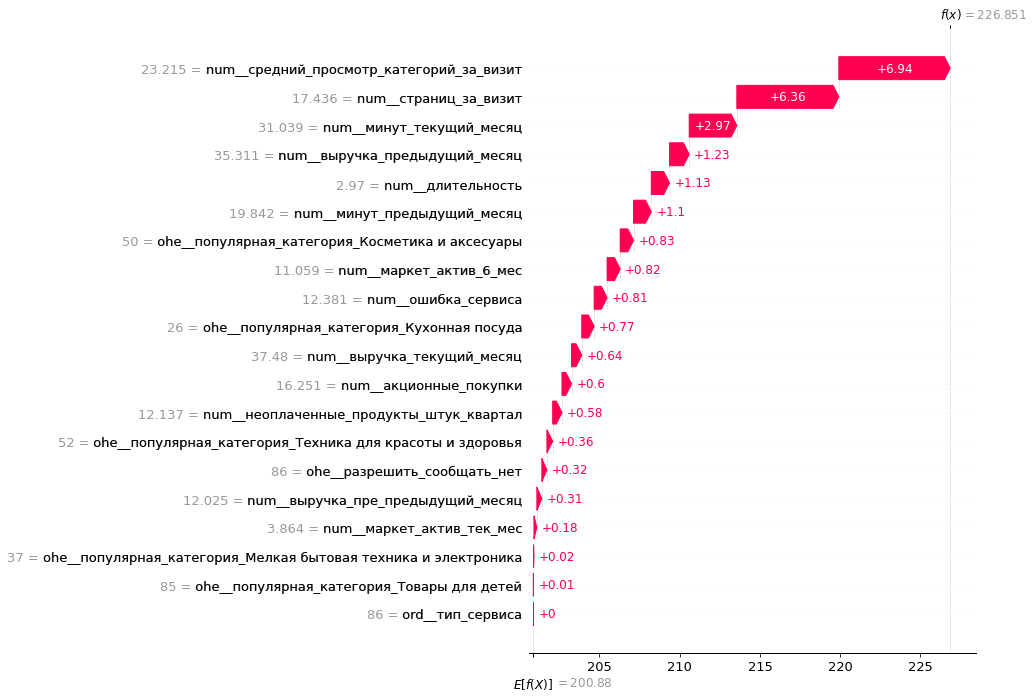

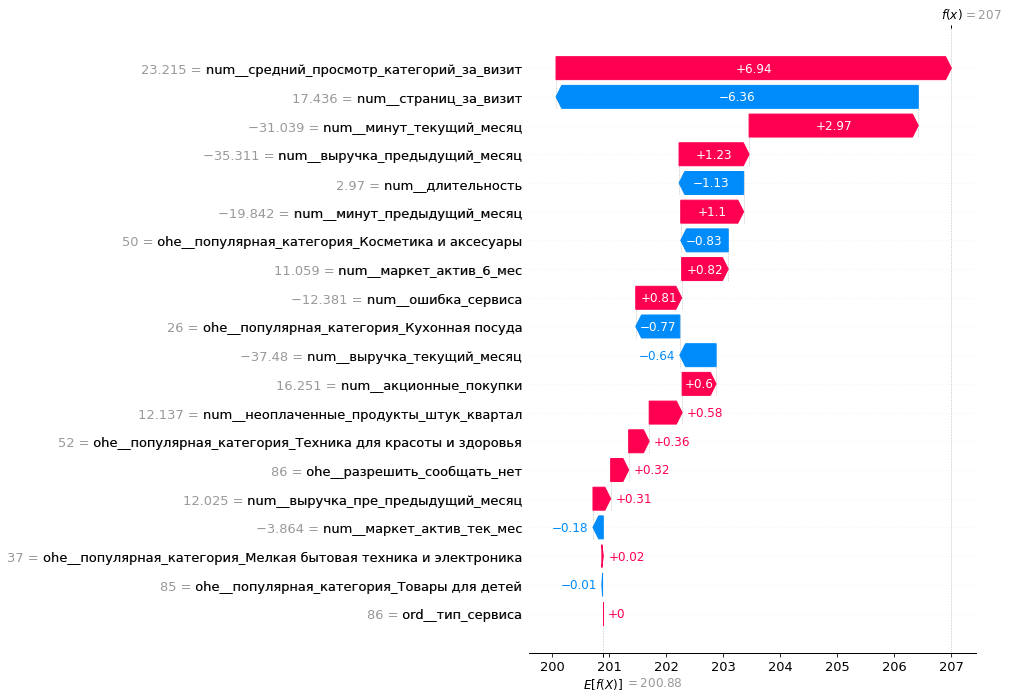

In [63]:
# Лучшая dtc-модель
best_model = dtc_model.best_estimator_

# Применение преобразований к X_train
X_transformed = pd.DataFrame(data_preprocessor.transform(X_test), columns = data_preprocessor.get_feature_names_out())

#display(X_test.head(3))
#display(X_transformed.head(3))

# Создание explainer по X_train
explainer = shap.TreeExplainer(best_model.named_steps['models'], X_transformed)

# Вычисление SHAP значений
shap_values = explainer(X_transformed)
#shap.plots.beeswarm(shap_values)
#shap.summary_plot(shap_values, X_test)
#shap.plots.bar(shap_values, max_display=17) 

# Визуализация
shap_values_sum = 0
for i in range(1, len(shap_values)):
    shap_values_sum += shap_values[i]

#shap.plots.waterfall(((shap_values_sum / len(shap_values)).abs[:,1]), max_display=20)
#shap.plots.waterfall(((shap_values_sum / len(shap_values))[:,1]), max_display=20)

shap.plots.waterfall((shap_values_sum.abs[:,1]), max_display=20)
shap.plots.waterfall((shap_values_sum[:,1]), max_display=20)

### SVC()

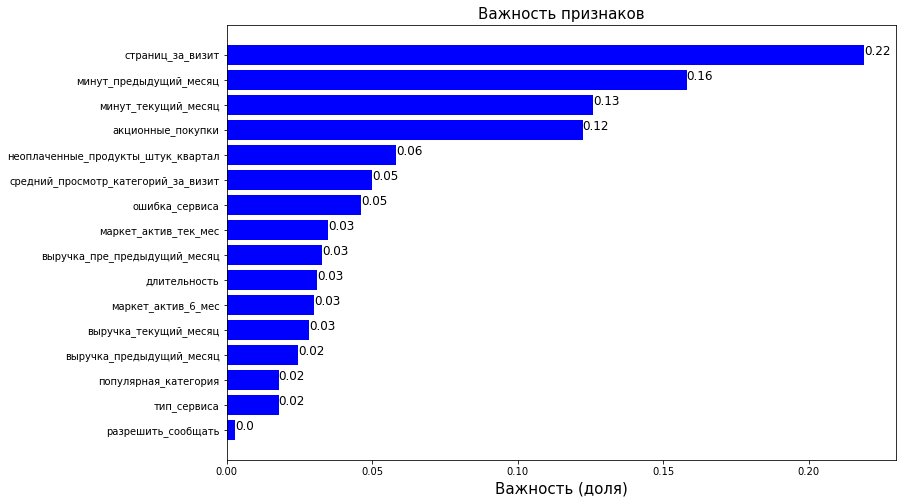

In [64]:
permutation = permutation_importance(pipe_final, X_train, y_train)
permutation_part = permutation.importances_mean / permutation.importances_mean.sum()

#display(permutation)
#display(permutation_part)

##feature_names = X_train.columns
##features = np.array(feature_names)

features = np.array(X_train.columns)

sorted_idx = permutation_part.argsort()

plt.figure(figsize=(12, 8))
plt.title('Важность признаков',fontsize = 15)
plt.barh(features[sorted_idx], permutation_part[sorted_idx], color='b', align='center')
#plt.barh(features[sorted_idx], permutation.importances_mean[sorted_idx], color='b', align='center')

plt.xlabel('Важность (доля)', fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(permutation_part[sorted_idx]):
    plt.text(value, index, str(round(value,2)), fontsize = 12)
plt.show()

### Выводы

* Значение показателей важности признаков отличаются в зависимости от модели. При этом, состав более важных и менее важных признаков не меняется.
* Наиболее важные признаки `SVC` - модели (лучшей модели):
    * страниц_за_визит
    * минут_предыдущий_месяц
    * минут_текущий_месяц
    * акционные_покупки
    * неоплаченные_продукты_штук_квартал
    * средний_просмотр_категорий_за_визит

## Сегментация покупателей

In [65]:
# Порог принадлежности к классам
threshold = 0.5

# прогноз Покупательской активности по предоставленным данным
#probas = pipe_final.predict_proba(X)
#display(probas[0:10, 1])

# Вероятность снижения Покупательской активности
X['probs'] = pipe_final.predict_proba(X)[:,1]

# Бинарный признак прогноза Покупательской активности 1 - снизится, 0 - не изменится
X['predictions'] = (X['probs'] > threshold).astype(int)

X['id'] = data_df['id']

# Формирование признака - Уровень прибыли. Сегментация проведена по квантилям поля - прибыль
money_df['уровень_прибыли'] = money_df['прибыль'].apply(
    lambda x: 'низкий' if x < money_df['прибыль'].quantile(0.25) 
        else ('высокий' if x > money_df['прибыль'].quantile(0.75) 
            else 'средний')
)
X = pd.merge(X, money_df, on = 'id', sort = True)

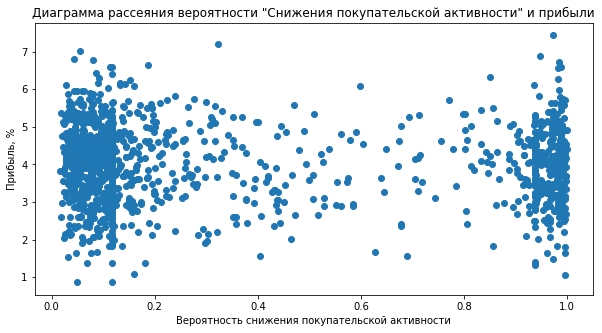

In [66]:
plt.figure(figsize=[10, 5])
plt.scatter(X.probs, X.прибыль);
plt.title('Диаграмма рассеяния вероятности "Снижения покупательской активности" и прибыли')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль, %')
plt.show()

In [67]:
X['прогноз_прибыли'] = X['probs'].apply(lambda x: 'Снизится' if x > threshold else 'Не снизится')
X['выручка_итого'] = X['выручка_пре_предыдущий_месяц'] + X['выручка_предыдущий_месяц'] + X['выручка_текущий_месяц']

display(X.head(5))

,выручка_пре_предыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,probs,predictions,id,прибыль,уровень_прибыли,прогноз_прибыли,выручка_итого
0,4472.0,5216.0,4971.6,12.0,10.0,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0.985813,1,215349,4.16,средний,Снизится,14659.6
1,4826.0,5457.5,5058.4,8.0,13.0,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0.227634,0,215350,3.13,низкий,Не снизится,15341.9
2,4793.0,6158.0,6610.4,11.0,13.0,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,0.938396,1,215351,4.87,высокий,Снизится,17561.4
3,4594.0,5807.5,5872.5,8.0,11.0,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,0.974067,1,215352,4.21,средний,Снизится,16274.0
4,5124.0,4738.5,5388.5,10.0,10.0,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0.812951,1,215353,3.95,средний,Снизится,15251.0


### Клиенты с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

 Доля покупателей с высоким количеством акционных покупок > 0.6 =   12.88 %
 в их составе: 
     покупатели с прогнозом падения прибыли <=  0.5               =   2.24 %
     покупатели с прогнозом падения прибыли >   0.5               =   10.64 %


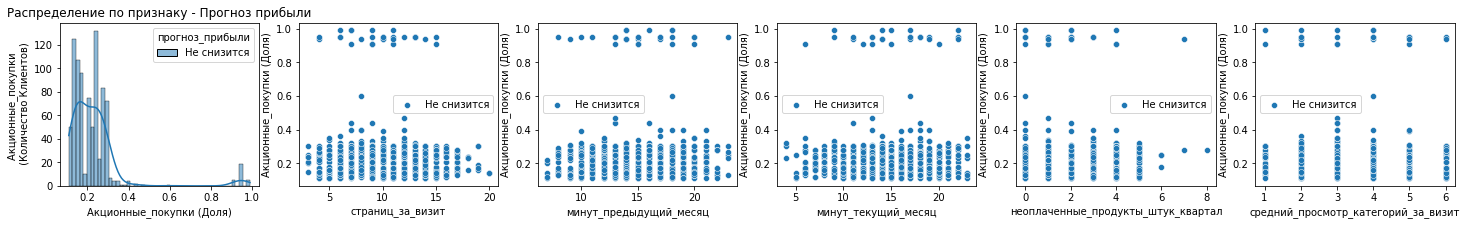

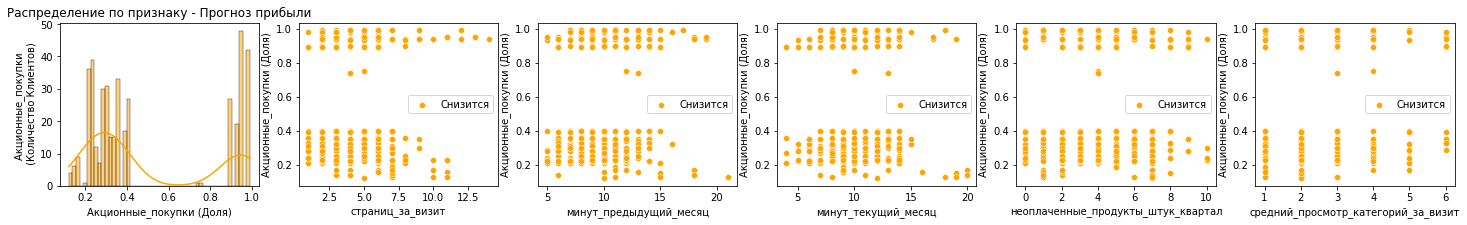

In [68]:
client_count = len(X)

hi_level_action_not_decrease = len(X.query('прогноз_прибыли == "Не снизится" and акционные_покупки > 0.6'))
hi_level_action_decrease = len(X.query('прогноз_прибыли == "Снизится" and акционные_покупки > 0.6'))

print(bold_start,'Доля покупателей с высоким количеством акционных покупок > 0.6 = ', bold_end, round((hi_level_action_decrease + hi_level_action_not_decrease) / client_count * 100, 2),'%')
print(bold_start,'в их составе:', bold_end)
print(bold_start,'    покупатели с прогнозом падения прибыли <= ',threshold,'              = ', bold_end, round((hi_level_action_not_decrease / client_count * 100), 2),'%')
print(bold_start,'    покупатели с прогнозом падения прибыли >  ',threshold,'              = ', bold_end, round((hi_level_action_decrease / client_count * 100), 2),'%')

research_field = 'акционные_покупки'
research_field_title_x = 'Акционные_покупки (Доля)'
research_field_title_y = 'Акционные_покупки \n (Количество Клиентов)'

property_fields = [
    'страниц_за_визит',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'неоплаченные_продукты_штук_квартал',
    'средний_просмотр_категорий_за_визит'
]

property_labels = [
    'страниц_за_визит',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'неоплаченные_продукты_штук_квартал',
    'средний_просмотр_категорий_за_визит'
]
data_fields = [
    'прогноз_прибыли']

labels = [
    'Прогноз прибыли']
data = X.query('прогноз_прибыли == "Не снизится"')
distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data)

data = X.query('прогноз_прибыли == "Снизится"')
distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data,
    uni_color_ = 'orange')


### Клиенты с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

 Доля покупателей с наиболее высокой прибыльностью =   24.9 %
 в их составе: 
     покупатели с прогнозом падения прибыли <=  0.5               =   17.58 %
     покупатели с прогнозом падения прибыли >   0.5               =   7.32 %


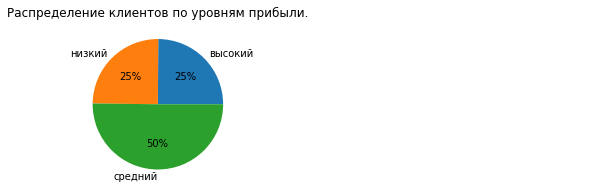

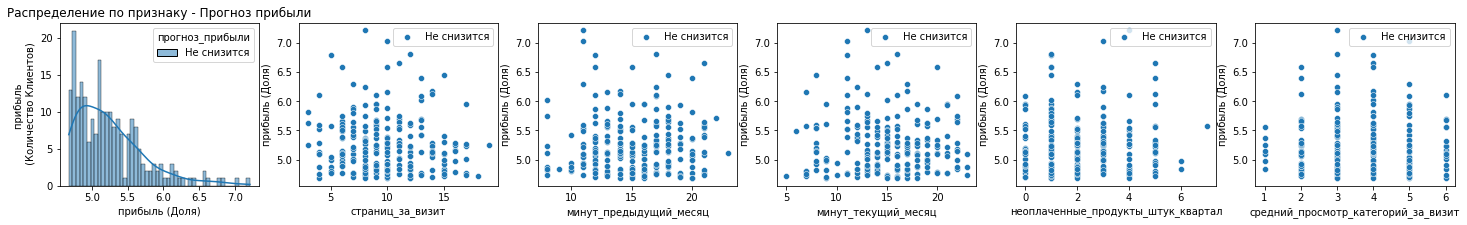

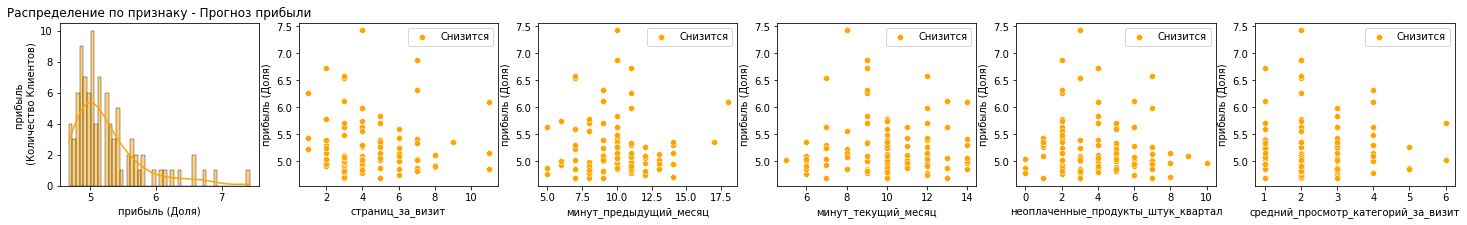

In [69]:
indexes = [
    'уровень_прибыли'
]
titles = [
'Распределение клиентов по уровням прибыли.'
]
#(data_, indexes_=[], titles_=[], values_='', aggfunc_='count', nrows_=2, ncols_=3, figsize_=(20, 7)):
categorical_property_visualization(
    data_= X,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count', 
    nrows_= 1, ncols_= 2, figsize_=(10, 3))

research_field = 'прибыль'
research_field_title_x = 'прибыль (Доля)'
research_field_title_y = 'прибыль \n (Количество Клиентов)'

hi_level_proffit_not_decrease = len(X.query('прогноз_прибыли == "Не снизится" and уровень_прибыли == "высокий"'))
hi_level_proffit_decrease = len(X.query('прогноз_прибыли == "Снизится" and уровень_прибыли == "высокий"'))

print(bold_start,'Доля покупателей с наиболее высокой прибыльностью = ', bold_end, round((hi_level_proffit_not_decrease + hi_level_proffit_decrease) / client_count * 100, 2),'%')
print(bold_start,'в их составе:', bold_end)
print(bold_start,'    покупатели с прогнозом падения прибыли <= ',threshold,'              = ', bold_end, round((hi_level_proffit_not_decrease / client_count * 100), 2),'%')
print(bold_start,'    покупатели с прогнозом падения прибыли >  ',threshold,'              = ', bold_end, round((hi_level_proffit_decrease / client_count * 100), 2),'%')

data = X.query('прогноз_прибыли == "Не снизится" and уровень_прибыли == "высокий"')

distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data)

data = X.query('прогноз_прибыли == "Снизится" and уровень_прибыли == "высокий"')
distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data,
    uni_color_ = 'orange')


### Покупатели техники

In [70]:
print(X['популярная_категория'].unique())

['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Кухонная посуда' 'Техника для красоты и здоровья'
 'Мелкая бытовая техника и электроника']


 Доля покупателей предпочитающих технику           =   27.53 %
 в их составе: 
     покупатели с прогнозом падения прибыли <=  0.5               =   22.67 %
     покупатели с прогнозом падения прибыли >   0.5               =   4.86 %


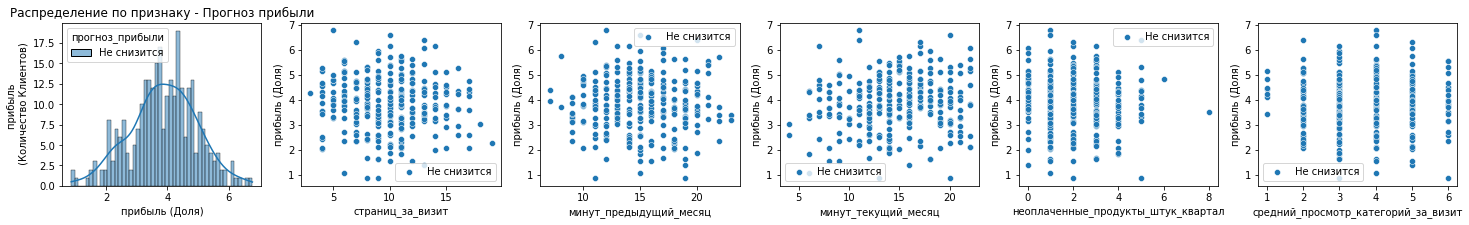

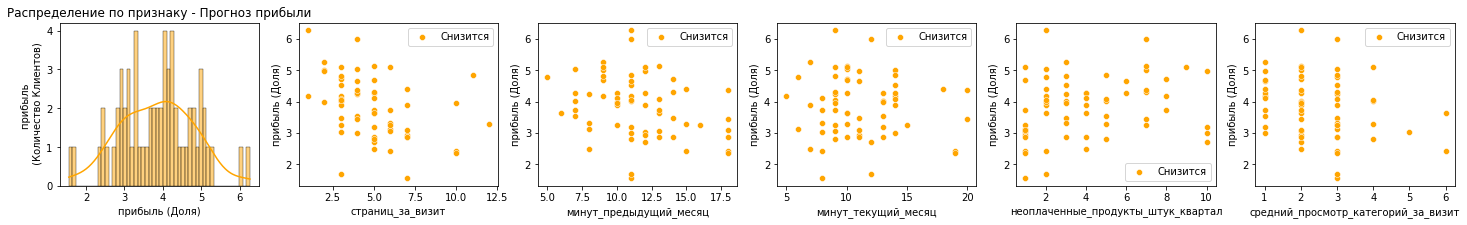

In [71]:
hi_level_action_not_decrease = len(X.query('прогноз_прибыли == "Не снизится" and (популярная_категория == "Мелкая бытовая техника и электроника" | популярная_категория == "Техника для красоты и здоровья")'))
hi_level_action_decrease = len(X.query('прогноз_прибыли == "Снизится" and (популярная_категория == "Мелкая бытовая техника и электроника" | популярная_категория == "Техника для красоты и здоровья")'))

print(bold_start,'Доля покупателей предпочитающих технику           = ', bold_end, round((hi_level_action_decrease + hi_level_action_not_decrease) / client_count * 100, 2),'%')
print(bold_start,'в их составе:', bold_end)
print(bold_start,'    покупатели с прогнозом падения прибыли <= ',threshold,'              = ', bold_end, round((hi_level_action_not_decrease / client_count * 100), 2),'%')
print(bold_start,'    покупатели с прогнозом падения прибыли >  ',threshold,'              = ', bold_end, round((hi_level_action_decrease / client_count * 100), 2),'%')

research_field = 'прибыль'
research_field_title_x = 'прибыль (Доля)'
research_field_title_y = 'прибыль \n (Количество Клиентов)'

data = X.query('прогноз_прибыли == "Не снизится" & (популярная_категория == "Мелкая бытовая техника и электроника" | популярная_категория == "Техника для красоты и здоровья")')
distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data)

data = X.query('прогноз_прибыли == "Снизится" & (популярная_категория == "Мелкая бытовая техника и электроника" | популярная_категория == "Техника для красоты и здоровья")')
distribution_visualization(
    research_field_ = research_field,
    research_field_title_x_ = research_field_title_x,
    research_field_title_y_ = research_field_title_y,
    property_fields_ = property_fields,
    property_labels_ = property_labels,
    data_fields_ = data_fields,
    labels_ = labels,
    data_ = data,
    uni_color_ = 'orange')


### Выводы

**Характеристики сегментов**
<br>
* **Клиенты с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.**
    * Доля покупателей с высоким количеством акционных покупок > 0.6 = 12.7% в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   2.25%
        * покупатели с прогнозом падения прибыли >   0.5 =   10.46%
* **Клиенты с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.**
    * Доля покупателей с наиболее высокой прибыльностью =   24.86 % в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   17.51 %
        * покупатели с прогнозом падения прибыли >   0.5 =   7.36 %     
* **Покупатели техники**
    * Доля покупателей, предпочитающих технику           =   27.58 % в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   22.77 %
        * покупатели с прогнозом падения прибыли >   0.5 =   4.8 %
<br>

* Для исследуемых сегментов характерно то, что **клиенты с вероятным снижением активности не задерживаются на сайте более 10 минут и просматривают не более 15 страниц за визит**.
* Минимальная доля клиентов с вероятным снижением активности принадлежит сегменту Покупателям техники.
* Минимальная доля клиентов с вероятным снижением активности принадлежит сегменту Покупателей акционных покупок.

## Общий вывод

**Цель проекта**: "Разработка решения, позволяющего персонализировать предложения постоянным клиентам, позволяющие увеличить их покупательскую активность."

* В процессе работы над проектом были загружены предоставленные данные. Структура данных соответствует описанию.
* На этапе предобработки данных пропуски и дубликаты не были обнаружены. Для удобства работы над проектом были заменены прописные буквы на соответствующие строчные, пробел заменены на знак подчеркивание. Тип некоторых полей приведен к float.

**Исследовательский анализ показал**:
* Распределение данных в исследуемых полях близко к нормальному.
* Поле `период` в `market_money_df` содержит уникальные значения: `текущий_месяц`, `предыдущий_месяц` и `пре_предыдущий_месяц`, а в `market_time_df` только `текущий_месяц` и `предыдущий_месяц`.
* Есть выбросы в некоторых полях, которые (выбросы) не являются аномальными. Исключение составляет поле `выручка`
* Аномалия  поля `выручка` заключается в единственном значении = 106862.2 у клиента с id = 215380 в текущем месяце. В предыдущих периодах выручка клиента id = 215380 составляла 5051.0 и 6077.0. Для нормализации распределения значение выручки для данного клиента в текущем месяце заменено на значение = 5564.0 (среднее значение за два предыдущих месяца по данному клиенту)


**Объединение источников данных**:
* Объединение market_file_df, market_money_df и market_time_df в data_df не повлекло потери данных.
* После объединения значения контрольных переменных revenue_check, duration_check, time_check совпадают с соответствующими рассчитанными значениями по объединенному датасету data_df.
* В соответствии с условием задания, в объединенный датасет не вошли данные о клиентах с нулевой активностью, т.е. которые не делали покупки в предыдущие два месяца.

**Корреляционный анализ показал что**:
* учитавать мультиколлинеарность нет необходимости
* утечки целевого признака нет

**Лучшая модель:**

* С использованием пайплайнов были собраны данные по моделям: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC`.
* У моделей `KNeighborsClassifier` и `SVC` показатель `mean_test_score` = 0.909, метрика `roc_auc` = 0.955 и 0.954. Показатели расчитаны на тренеровочной базе. (`mean_test_score` моделей `LogisticRegression` и `DecisionTreeClassifier` = 0.900976 и 0.799210, соответственно)
* Показатели, расчитанные на тестовой базе у моделей `KNeighborsClassifier` и `SVC` значительно отличаются.
    * `knn` - модель
        *  Площадь под ROC-кривой =  0.898
        *  Потеря качества = -5.919 %
    *  `svc` - модель
        *  Площадь под ROC-кривой =  0.921
        *  Потеря качества на тестовой выборке  = -3.472%
*  **При том, что значения показателей `knn` и `svc` моделей, расчитанных на тренеровочной базе очень близки, тестовые значения показателей модели `svc` значительно лучше. Для задачи проекта больше подходит `svc` - модель**

**Важность признаков:**
<br>

**Анализ сегментов, предложенных заказчиком**
<br>
* **Клиенты с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.**
    * Доля покупателей с высоким количеством акционных покупок > 0.6 = 12.7% в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   2.25%
        * покупатели с прогнозом падения прибыли >   0.5 =   10.46%
* **Клиенты с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.**
    * Доля покупателей с наиболее высокой прибыльностью =   24.86 % в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   17.51 %
        * покупатели с прогнозом падения прибыли >   0.5 =   7.36 %     
* **Покупатели техники**
    * Доля покупателей, предпочитающих технику           =   27.58 % в их составе:
        * покупатели с прогнозом падения прибыли <=  0.5 =   22.77 %
        * покупатели с прогнозом падения прибыли >   0.5 =   4.8 %
<br>

* Для исследуемых сегментов характерно то, что **клиенты с вероятным снижением активности не задерживаются на сайте более 10 минут и просматривают не более 15 страниц за визит**.
* **Минимальная доля клиентов** с вероятным снижением активности принадлежит сегменту Покупателям техники.
* **Максимальная доля клиентов** с вероятным снижением активности принадлежит сегменту Покупателей акционных покупок.

**При разработке программ повышения прибыльности клиентов необходимо в первую очередь учитывать признаки клиентов:**

    * страниц_за_визит
    * минут_предыдущий_месяц
    * минут_текущий_месяц
    * акционные_покупки
    * неоплаченные_продукты_штук_квартал
    * средний_просмотр_категорий_за_визит
